In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.path.exists('/content/gdrive/My Drive/Model Data.zip')

True

In [0]:
#!unzip -a '/content/gdrive/My Drive/Model Data.zip'

In [5]:
import pandas as pd
import imageio
import tensorboard
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings('ignore')
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, Dropout, AveragePooling2D

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [0]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard
import tensorflow as tf
from time import time
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
from keras import layers


In [0]:
# Loading Images

train_ds_location = "/content/5. Model Inputs/train"
test_ds_location = "/content/5. Model Inputs/test"
PATH_OUTPUTS_MODEL = '/content/5. Model Inputs'

In [0]:
width = 408
height = 306

## Loading dataset using Keras

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_gen = ImageDataGenerator(rescale=1/255)

In [0]:
BATCH_SIZE = 32

In [14]:
train_data = train_gen.flow_from_directory(train_ds_location,
                              target_size = (408,306),
                              batch_size = BATCH_SIZE,
                              class_mode = 'categorical')

Found 1292 images belonging to 4 classes.


In [15]:
train_data.n

1292

In [16]:
train_data.class_indices

{'defective_lav': 0,
 'defective_ldl': 1,
 'non_defective': 2,
 'non_defective_bubbles': 3}

In [17]:
train_data.image_shape

(408, 306, 3)

### Test Data Generator

In [0]:
test_gen = ImageDataGenerator(rescale=1/255)

In [19]:
test_data = test_gen.flow_from_directory(test_ds_location,
                              target_size = (408,306),
                              batch_size = BATCH_SIZE,
                              class_mode = 'categorical')

Found 49 images belonging to 4 classes.


In [20]:
test_data.n

49

## Model V1

In [21]:
# Model V1

model_v1 = Sequential()
model_v1.add(BatchNormalization(input_shape= train_data.image_shape))
keras.initializers.he_normal(seed=None)

# Layer 1
model_v1.add(Conv2D(filters = 8,
                    kernel_size = (3,3)))
model_v1.add(Activation('relu'))
model_v1.add(BatchNormalization())

# Layer 2
model_v1.add(Conv2D(filters = 16,
                    kernel_size = (3,3)))
model_v1.add(Activation('relu'))
model_v1.add(BatchNormalization())

# Layer 3
model_v1.add(Conv2D(filters = 32,
                    kernel_size = (3,3)))
model_v1.add(Activation('relu'))
model_v1.add(BatchNormalization())


# Layer 4
model_v1.add(Conv2D(filters = 64,
                    kernel_size = (3,3)))
model_v1.add(MaxPool2D(pool_size=(3,3)))
model_v1.add(Activation('relu'))
model_v1.add(BatchNormalization())



# Flatten
model_v1.add(Flatten())
model_v1.add(Dense(4))

# Output Layer
model_v1.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model_v1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 408, 306, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 406, 304, 8)       224       
_________________________________________________________________
activation_1 (Activation)    (None, 406, 304, 8)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 406, 304, 8)       32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 404, 302, 16)      1168      
_________________________________________________________________
activation_2 (Activation)    (None, 404, 302, 16)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 404, 302, 16)      64        
__________

In [0]:
# TensorBoard(log_dir='./logs',
#                histogram_freq=1,
#                batch_size=BATCH_SIZE,
#                write_graph=True,
#                write_grads=True,
#                write_images=True,
#              embeddings_freq=1,
#                update_freq='EPOCHS')

In [0]:
callback_list = [EarlyStopping(monitor='val_loss', patience=15),
                 ModelCheckpoint(filepath='Final_project1.h5',
                                 save_best_only=True),
                                 ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=2)]

In [0]:
a = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model_v1.compile(optimizer = a,
                 loss='categorical_crossentropy',
                 metrics = ['accuracy'])

#tensorboard = TensorBoard(log_dir="logs/7".format(time()))

In [0]:
EPOCHS = 100

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
        
history = LossHistory()

In [28]:
history_v1 = model_v1.fit_generator(train_data,
                       epochs = EPOCHS,
                       steps_per_epoch = train_data.n/BATCH_SIZE,
                       validation_steps = test_data.n/BATCH_SIZE,
                       shuffle = True,
                       callbacks = callback_list + [history],                                   
                       validation_data = test_data)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
41/40 [==============================] - 40s 972ms/step - loss: 7.3861 - acc: 0.5232 - val_loss: 5.9209 - val_acc: 0.6327
Epoch 2/100
41/40 [==============================] - 29s 718ms/step - loss: 7.5547 - acc: 0.5300 - val_loss: 5.9209 - val_acc: 0.6327
Epoch 3/100
41/40 [==============================] - 29s 717ms/step - loss: 8.1451 - acc: 0.4947 - val_loss: 3.6183 - val_acc: 0.7755
Epoch 4/100
41/40 [==============================] - 29s 717ms/step - loss: 7.2626 - acc: 0.5485 - val_loss: 3.9473 - val_acc: 0.7551
Epoch 5/100
41/40 [==============================] - 29s 717ms/step - loss: 7.5005 - acc: 0.5340 - val_loss: 5.5920 - val_acc: 0.6531
Epoch 6/100
41/40 [==============================] - 29s 717ms/step - loss: 8.2188 - acc: 0.4901 - val_loss: 3.9473 - val_acc: 0.7551
Epoch 7/100
41/40 [==============================] - 29s 716ms/step - loss: 7.9151 - acc: 0.5086 - val_loss: 3.9473 - val_acc: 0.7551
Epoch 8/100
41

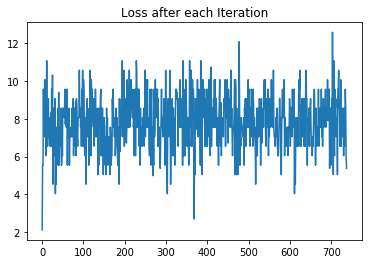

In [29]:
plt.plot(history.losses)
plt.title('Loss after each Iteration')

plt.show()

Text(0.5, 0, 'Epoch')

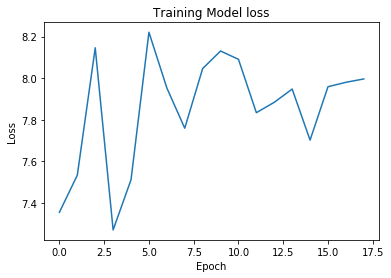

In [30]:
# plot loss curve
plt.plot(history_v1.history['loss'], label = 'training')
plt.title('Training Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

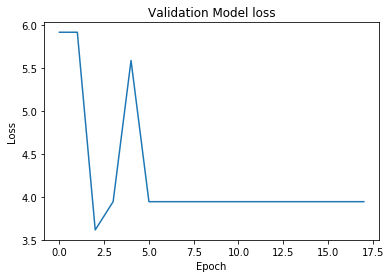

In [31]:
plt.plot(history_v1.history['val_loss'], label = 'test')
plt.title('Validation Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

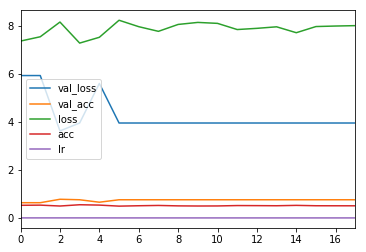

In [32]:
pd.DataFrame(history_v1.history).plot()

In [0]:
def get_predictions(path):
  # Runs predictions for all images in a path (Structured similar to train/test folders) and returns a dataframe with the image, y_actual, y_predicted
  # Assumes the images in the path need to be rescaled to 1/255, have a target_size = IMG_WIDTH,IMG_HEIGHT (Defined in the code)
  dummy_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
      path,
      target_size=(408,306),
      batch_size=2000,
      shuffle=False,
      class_mode='categorical')
  img,y_actual = next(dummy_gen)

  y_actual = np.argmax(y_actual,axis=1)

  y_pred = np.argmax(model_v1.predict(img),axis=1)
#   return pd.DataFrame({'image':img,
#                       'y_actual':y_actual,
#                       'y_pred':y_pred})
  filepaths = dummy_gen.filepaths
  return img,y_actual,y_pred, filepaths

In [34]:
mapping_labels = dict((val,key) for key,val in train_data.class_indices.items())
mapping_labels

{0: 'defective_lav',
 1: 'defective_ldl',
 2: 'non_defective',
 3: 'non_defective_bubbles'}

In [0]:
classes = [
    'defective_lav', 'defective_ldl', 'non_defective', 'non_defective_bubbles'
]

In [0]:
def get_labels(array):
  return pd.Series(array).replace(mapping_labels)

In [0]:
# Source - https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10, 10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)

In [38]:
images, y_true, y_pred, filepaths = get_predictions(train_ds_location)

Found 1292 images belonging to 4 classes.


In [39]:
pd.Series(y_true==y_pred).value_counts()

True     657
False    635
dtype: int64

Train Confusion Matrix


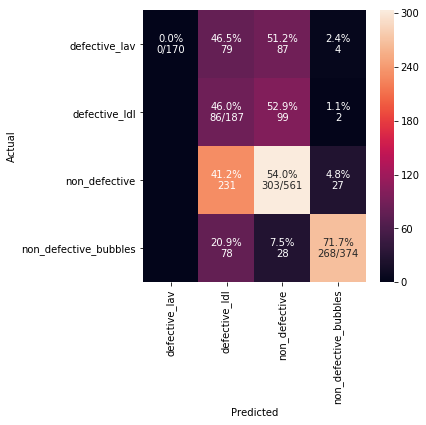

In [40]:
print('Train Confusion Matrix')
cm_analysis(get_labels(y_true), get_labels(y_pred),filename=os.path.join(PATH_OUTPUTS_MODEL,"Confusion matrix - train.png"),
            labels=classes,figsize=(5,5))

In [41]:
print(classification_report(y_true,y_pred,target_names=classes))

                       precision    recall  f1-score   support

        defective_lav       0.00      0.00      0.00       170
        defective_ldl       0.18      0.46      0.26       187
        non_defective       0.59      0.54      0.56       561
non_defective_bubbles       0.89      0.72      0.79       374

             accuracy                           0.51      1292
            macro avg       0.41      0.43      0.40      1292
         weighted avg       0.54      0.51      0.51      1292



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
# Confusion Matrix for Test Data
images_test, y_true_test, y_pred_test, filepaths_test = get_predictions(test_ds_location)

Found 49 images belonging to 4 classes.


In [43]:
pd.Series(y_true_test==y_pred_test).value_counts()

True     37
False    12
dtype: int64

Test Confusion Matrix


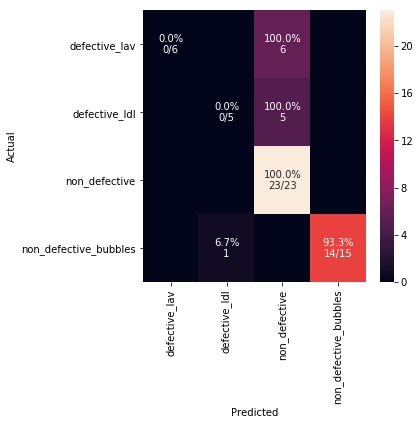

In [44]:

print('Test Confusion Matrix')
cm_analysis(get_labels(y_true_test), get_labels(y_pred_test),filename=os.path.join(PATH_OUTPUTS_MODEL,"Confusion matrix - test.png"),
            labels=classes,figsize=(5,5))

In [45]:
print(classification_report(y_true_test,y_pred_test,target_names=classes))

                       precision    recall  f1-score   support

        defective_lav       0.00      0.00      0.00         6
        defective_ldl       0.00      0.00      0.00         5
        non_defective       0.68      1.00      0.81        23
non_defective_bubbles       1.00      0.93      0.97        15

             accuracy                           0.76        49
            macro avg       0.42      0.48      0.44        49
         weighted avg       0.62      0.76      0.67        49



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# End of code